In [56]:
import requests

url_all = 'https://api.alternative.me/fng/?limit=0'
url_10 = 'https://api.alternative.me/fng/?limit=10'
url_now = 'https://api.alternative.me/fng/?limit=0'

r = requests.get(url_all)

print("Status code",r.status_code)

#将API响应存储在一个变量中
response_dict = r.json()


#处理结束
print(response_dict.keys())




Status code 200
dict_keys(['name', 'data', 'metadata'])


In [57]:
data = response_dict['data']
print(data[0])

data_length = len(data)
print(data_length)






{'value': '55', 'value_classification': 'Greed', 'timestamp': '1552536000', 'time_until_update': '66897'}
406


In [58]:
import time

times_tamp = int(data[0]['timestamp'])
print(times_tamp)

time_local = time.localtime(times_tamp)
print(time_local)

time_str = time.strftime("%Y-%m-%d",time_local)
print(time_str)

1552536000
time.struct_time(tm_year=2019, tm_mon=3, tm_mday=14, tm_hour=12, tm_min=0, tm_sec=0, tm_wday=3, tm_yday=73, tm_isdst=0)
2019-03-14 12:00:00


In [59]:
for i in range(data_length):
    times_tamp = int(data[i]['timestamp'])
    time_local = time.localtime(times_tamp)
    time_str = time.strftime("%Y-%m-%d %H:%M:%S",time_local)
    data[i]['time'] = time_str
    data[i]['value'] = int(data[i]['value'])
    
print(len(data))
    

406


In [69]:
import pandas as pd

df = pd.DataFrame(data,columns=['time','value','value_classification'])
print(df.__len__(),df.head())

print(df.tail())


406                   time  value value_classification
0  2019-03-14 12:00:00     55                Greed
1  2019-03-13 12:00:00     54              Neutral
2  2019-03-12 12:00:00     56                Greed
3  2019-03-11 12:00:00     56                Greed
4  2019-03-10 13:00:00     55                Greed
                    time  value value_classification
401  2018-02-05 13:00:00     11         Extreme Fear
402  2018-02-04 13:00:00     24                 Fear
403  2018-02-03 13:00:00     40                 Fear
404  2018-02-02 13:00:00     15         Extreme Fear
405  2018-02-01 13:00:00     30                 Fear


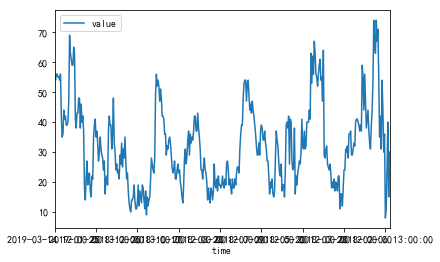

In [64]:
from matplotlib import pyplot as plt

df.plot(x = 'time' )
plt.show()


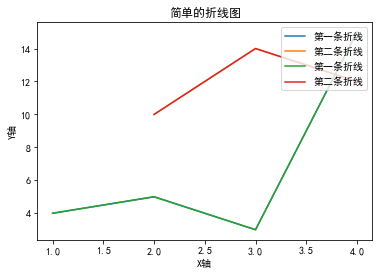